In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Ziyad EL bachiri\AppData\Local\Temp\pip-install-0jxru454\tensorflow-gpu_f4938cfa174548e39ed9d6f30230c65c\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pypr

In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np


In [6]:
df = pd.read_csv(os.path.join('train.csv','train.csv'))

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
from tensorflow.keras.layers import TextVectorization

In [15]:
x= df['comment_text']
y= df[df.columns[2:]].values

In [18]:
MAX_WORDS = 500000 # number of words in the vocab

In [19]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,output_sequence_length=1800,output_mode='int')

In [20]:
vectorizer.adapt(x.values)

In [23]:
vectorized_text= vectorizer(x.values)

In [24]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)


In [25]:
batch_x, batch_y = dataset.as_numpy_iterator().next()

In [26]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [27]:
train_generator = train.as_numpy_iterator()

In [29]:
train_generator.next()

(array([[    14,      9,      2, ...,      0,      0,      0],
        [   272,      6,   5970, ...,      0,      0,      0],
        [ 49651,      9,      6, ...,      0,      0,      0],
        ...,
        [    73,     33,      7, ...,      0,      0,      0],
        [ 17466,  20455,   3096, ...,      0,      0,      0],
        [132362,     50,      9, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Embedding , Dense

In [34]:
model = Sequential()
model.add(Embedding(MAX_WORDS+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [39]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          16000032  
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [41]:
history= model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 6481s 928ms/step - loss: 0.0622 - val_loss: 0.0484


In [42]:
history.history

{'loss': [0.06216122582554817], 'val_loss': [0.04841193929314613]}

In [43]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

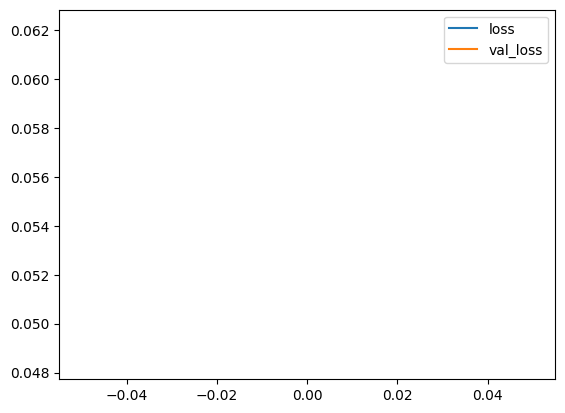

In [44]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [49]:
input_text = vectorizer('you are very good')

In [50]:
batch = test.as_numpy_iterator().next()

In [52]:
batch_x, batch_y = test.as_numpy_iterator().next()

In [53]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 0s 196ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [54]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 126ms/step
